# 1 Introduction to the empirical data analysis

## 1.1 Multivariate analysis methods in this book: overview and basics

### 1.1.3 Classification of multivariate analysis methods

### 1.1.3.1 Structure-checking methods

|  |  | Independent Variable | |
| :- | -: | :-: | :-: |
|  | ***Scales***  | *metric* | *nominal/ordinal* |
| **Dependent Variable** | *metric* | Regression analysis | Variance analysis |
|  | *nominal/ordinal* | Discriminant Analysis, Logistic regression | Contingency analysis, Conjoint-analysis |

### 1.1.3.2 Structure-discovery methods

* Factor analysis (exploratory)
* Cluster anaylsis

## 1.2 Basic statistical concepts

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

### 1.2.1 Basic statistical characteristics

In [2]:
# Data from Tab. 1.7 as dictionary (and dataframe)
data = { 'x1':[25, 27, 24, 30, 29], 'x2':[1800, 2000, 1900, 2800, 3500], 'x3':[1, 0, 0, 0, 1] }
df = pd.DataFrame(data)
df

,x1,x2,x3
0,25,1800,1
1,27,2000,0
2,24,1900,0
3,30,2800,0
4,29,3500,1


#### Mean

In [3]:
# my mean function (formula 1.1)
def myMean(x):
    return sum(x) / len(x)

In [4]:
# mean values with own function, numpy or dataframes
print(f"x1 mean: {myMean(data['x1'])} ({np.mean(data['x1'])}, {df['x1'].mean()})")
print(f"x2 mean: {myMean(data['x2'])} ({np.mean(data['x2'])}, {df['x2'].mean()})")
print(f"x3 mean: {myMean(data['x3'])} ({np.mean(data['x3'])}, {df['x3'].mean()})")

x1 mean: 27.0 (27.0, 27.0)
x2 mean: 2400.0 (2400.0, 2400.0)
x3 mean: 0.4 (0.4, 0.4)


#### Variance and standard deviation

In [5]:
# my variance function (with small difference to the formula 1.2)
def myVariance(x):
    mean = myMean(x)
    s = sum([(xi - mean) ** 2 for xi in x])
    return s / (len(x) - 1) # difference

# my standard deviation function (formula 1.3)
def myStd(x):
    mean = myMean(x)
    s = sum([(xi - mean) ** 2 for xi in x])
    return math.sqrt(s / (len(x) - 1))

In [6]:
# variance and standard deviation values with own function, numpy or dataframes
print(f"x1 variance: {myVariance(data['x1'])} ({np.var(data['x1'], ddof=1)}, {df['x1'].var()})")
print(f"x2 variance: {myVariance(data['x2'])} ({np.var(data['x2'], ddof=1)}, {df['x2'].var()})")
print(f"x3 variance: {myVariance(data['x3'])} ({np.var(data['x3'], ddof=1)}, {df['x3'].var()})")
print(f"x1 standard deviation: {myStd(data['x1'])} ({np.std(data['x1'], ddof=1)}, {df['x1'].std()})")
print(f"x2 standard deviation: {myStd(data['x2'])} ({np.std(data['x2'], ddof=1)}, {df['x2'].std()})")
print(f"x3 standard deviation: {myStd(data['x3'])} ({np.std(data['x3'], ddof=1)}, {df['x3'].std()})")

x1 variance: 6.5 (6.5, 6.5)
x2 variance: 535000.0 (535000.0, 535000.0)
x3 variance: 0.30000000000000004 (0.30000000000000004, 0.30000000000000004)
x1 standard deviation: 2.5495097567963922 (2.5495097567963922, 2.5495097567963922)
x2 standard deviation: 731.4369419163896 (731.4369419163896, 731.4369419163896)
x3 standard deviation: 0.5477225575051662 (0.5477225575051662, 0.5477225575051662)


#### Standardization

In [7]:
meanX1, meanX2, meanX3 = myMean(data['x1']), myMean(data['x2']), myMean(data['x3'])
sX1, sX2, sX3          = myStd(data['x1']),  myStd(data['x2']),  myStd(data['x3'])

# (formula 1.6)
data['A'] = [xi - meanX1 for xi in data['x1']]
data['B'] = [ai / sX1  for ai in data['A']]
data['C'] = [xi - meanX2 for xi in data['x2']]
data['D'] = [ci / sX2  for ci in data['C']]
data['E'] = [xi - meanX3 for xi in data['x3']]
data['F'] = [ei / sX3  for ei in data['E']]
pd.DataFrame(data=data, columns=("x1","A","B","x2","C","D","x3","E","F"))

,x1,A,B,x2,C,D,x3,E,F
0,25,-2.0,-0.784465,1800,-600.0,-0.820303,1,0.6,1.095445
1,27,0.0,0.000000,2000,-400.0,-0.546869,0,-0.4,-0.730297
2,24,-3.0,-1.176697,1900,-500.0,-0.683586,0,-0.4,-0.730297
3,30,3.0,1.176697,2800,400.0,0.546869,0,-0.4,-0.730297
4,29,2.0,0.784465,3500,1100.0,1.503889,1,0.6,1.095445


In [8]:
# only standardized data:
dfStd = pd.DataFrame({ 'z1': data['B'], 'z2': data['D'], 'z3': data['F']})
dfStd

,z1,z2,z3
0,-0.784465,-0.820303,1.095445
1,0.000000,-0.546869,-0.730297
2,-1.176697,-0.683586,-0.730297
3,1.176697,0.546869,-0.730297
4,0.784465,1.503889,1.095445


In [9]:
dfStd.describe()

,z1,z2,z3
count,5.000000,5.000000,5.000000
mean,0.000000,0.000000,0.000000
std,1.000000,1.000000,1.000000
min,-1.176697,-0.820303,-0.730297
25%,-0.784465,-0.683586,-0.730297
50%,0.000000,-0.546869,-0.730297
75%,0.784465,0.546869,1.095445
max,1.176697,1.503889,1.095445


In [10]:
dfStd.var()

z1    1.0
z2    1.0
z3    1.0
dtype: float64

In [11]:
dfStd.sum()

z1    0.0
z2    0.0
z3    0.0
dtype: float64

### 1.2.2 Covariance und correlation

Covariance

In [12]:
# my covariance function (formula 1.7)
def myCov(x1, x2):
    mean1 = myMean(x1)
    mean2 = myMean(x2)
    s = sum([(x1[i] - mean1) * (x2[i] - mean2) for i in range(0, len(x1))])
    return s / (len(x1) - 1)

<div class="alert alert-block alert-warning">
    <b>Difference to the book</b>: Using here 'E' instead of 'F'
</div>

In [13]:
data['AC'] = [data['A'][i] * data['C'][i]  for i in range(0, len(data['A']))]
data['AE'] = [data['A'][i] * data['E'][i]  for i in range(0, len(data['A']))]
data['CE'] = [data['C'][i] * data['E'][i]  for i in range(0, len(data['A']))]
pd.DataFrame(data = data, columns=("A","C","E","AC","AE","CE"))

,A,C,E,AC,AE,CE
0,-2.0,-600.0,0.6,1200.0,-1.2,-360.0
1,0.0,-400.0,-0.4,-0.0,-0.0,160.0
2,-3.0,-500.0,-0.4,1500.0,1.2,200.0
3,3.0,400.0,-0.4,1200.0,-1.2,-160.0
4,2.0,1100.0,0.6,2200.0,1.2,660.0


In [14]:
sX1X2, sX1X3, sX2X3 = myCov(data['x1'], data['x2']), myCov(data['x1'], data['x3']), myCov(data['x2'], data['x3'])
print(f"covariance(x1,x2): {sX1X2}, ")
print(f"covariance(x1,x3): {sX1X3}")
print(f"covariance(x2,x3): {sX2X3}")

covariance(x1,x2): 1525.0, 
covariance(x1,x3): 0.0
covariance(x2,x3): 125.0


In [15]:
pd.DataFrame(data=data, columns=("x1","x2","x3")).cov()

,x1,x2,x3
x1,6.5,1525.0,0.0
x2,1525.0,535000.0,125.0
x3,0.0,125.0,0.3


Correlation

In [16]:
# my correlation function (formula 1.8)
def myCorr(si, sj, sij):
    return sij / (si * sj)

In [17]:
print(f"correlation(x1,x2): {myCorr(sX1, sX2, sX1X2)}")
print(f"correlation(x1,x3): {myCorr(sX1, sX3, sX1X3)}")
print(f"correlation(x2,x3): {myCorr(sX2, sX3, sX2X3)}")

correlation(x1,x2): 0.817779603261871
correlation(x1,x3): 0.0
correlation(x2,x3): 0.31201286018707364


In [18]:
pd.DataFrame(data=data, columns=("x1","x2","x3")).corr()

,x1,x2,x3
x1,1.000000e+00,0.817780,-3.975236e-17
x2,8.177796e-01,1.000000,3.120129e-01
x3,-3.975236e-17,0.312013,1.000000e+00


#### t-statistic and F-statistic

In [19]:
def myTStatistic(corr, N):
    return corr / math.sqrt((1 - corr **2) / (N - 2))
def myFStatistic(corr, N):
    return corr ** 2 / ((1 - corr **2) / (N - 2))

In [20]:
print(f"t(x1,x2): {myTStatistic(myCorr(sX1, sX2, sX1X2), len(data['x1']))} \
      t(x1,x3): {myTStatistic(myCorr(sX1, sX3, sX1X3), len(data['x1']))} \
      t(x2,x3): {myTStatistic(myCorr(sX2, sX3, sX2X3), len(data['x1']))}")
print(f"F(x1,x2): {myFStatistic(myCorr(sX1, sX2, sX1X2), len(data['x1']))} \
      F(x1,x3): {myFStatistic(myCorr(sX1, sX3, sX1X3), len(data['x1']))} \
      F(x2,x3): {myFStatistic(myCorr(sX2, sX3, sX2X3), len(data['x1']))}")

t(x1,x2): 2.4610916942947365       t(x1,x3): 0.0       t(x2,x3): 0.5688187660501992
F(x1,x2): 6.0569723277265375       F(x1,x3): 0.0       F(x2,x3): 0.32355478861087134


## 1.3 Basics of statistical testing

### 1.3.1 Performing a mean test (two-sided)

#### 1.3.1.1 Statistical testing using a critical test value

In [21]:
# Test data from sample
mu0, N, mean, s = 7.5, 100, 7.3, 1.05

# my mean t function (formula 1.9)
def myMeanTest(mean, mu0, s, N):
    se = (s / math.sqrt(N))
    return (mean - mu0) / se

meanTestT = myMeanTest(mean, mu0, s, N)
print(round(meanTestT, 2))

-1.9


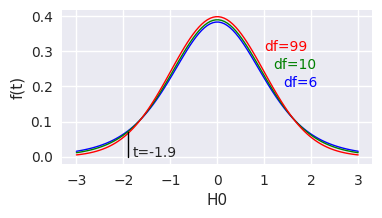

In [22]:
# show meanTestT with probability density functions (pdf)
plt.style.use('seaborn')
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
muNorm, sigmaNorm = 0, 1
x = np.linspace(muNorm - 3 * sigmaNorm, muNorm + 3 * sigmaNorm, 100)
# plt.plot(x, norm.pdf(x, muNorm, sigmaNorm), color='red', linewidth=1.0)
plt.plot(x, t.pdf(x, 6), color='blue', linewidth=1.0)
plt.plot(x, t.pdf(x, 10), color='green', linewidth=1.0)
plt.plot(x, t.pdf(x, 99), color='red', linewidth=1.0)
plt.plot([meanTestT, meanTestT], [0.0, 0.07], color='black', linewidth=1.0)
plt.text(meanTestT + 0.1, 0.0, f"t={round(meanTestT, 2)}")
plt.text(1, 0.3, "df=99", color='red')
plt.text(1.2, 0.25, "df=10", color='green')
plt.text(1.4, 0.2, "df=6", color='blue')
plt.xlabel("H0")
plt.ylabel("f(t)")
plt.show()

In [23]:
alpha = 0.05 # set 5% significance level (probability of rejecting the null hypothesis when it is true)
tAlpha2 = t.ppf(1 - alpha/2, df=N-1) # two-sided, 1.984 in Tab. 1.12 for df=99, alpa=0.05, here calculated
print(tAlpha2)

1.9842169515086827


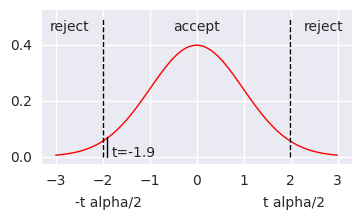

In [24]:
plt.style.use('seaborn')
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
muNorm, sigmaNorm = 0, 1
x = np.linspace(muNorm - 3 * sigmaNorm, muNorm + 3 * sigmaNorm, 100)
plt.plot(x, t.pdf(x, 99), color='red', linewidth=1.0)
plt.plot([meanTestT, meanTestT], [0.0, 0.07], color='black', linewidth=1.0)
plt.plot([tAlpha2, tAlpha2], [0.0, 0.5], color='black', linewidth=1.0, linestyle='dashed')
plt.plot([-tAlpha2, -tAlpha2], [0.0, 0.5], color='black', linewidth=1.0, linestyle='dashed')
plt.text(meanTestT + 0.1, 0.0, f"t={round(meanTestT, 2)}")
plt.text(tAlpha2 + 0.1, -0.18, f"t alpha/2", horizontalalignment='center')
plt.text(-tAlpha2 + 0.1, -0.18, f"-t alpha/2", horizontalalignment='center')
plt.text(0.0, 0.45, f"accept", horizontalalignment='center')
plt.text(-2.7, 0.45, f"reject", horizontalalignment='center')
plt.text(2.7, 0.45, f"reject", horizontalalignment='center')
plt.show()

In [25]:
# show a classic t Table (calculating the values using the percent point function from scipy.stats.t)
tTableDF = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 99]
tTableAlpa10Percent = [round(t.ppf(1 - 0.1  / 2, df=df), 3) for df in tTableDF] # two-sided
tTableAlpa5Percent  = [round(t.ppf(1 - 0.05 / 2, df=df), 3) for df in tTableDF]
tTableAlpa1Percent  = [round(t.ppf(1 - 0.01 / 2, df=df), 3) for df in tTableDF]
tTableDF.append('norm')
tTableAlpa10Percent.append(round(norm.ppf(1 - 0.1 / 2), 3))
tTableAlpa5Percent.append(round(norm.ppf(1 - 0.05 / 2), 3))
tTableAlpa1Percent.append(round(norm.ppf(1 - 0.01 / 2), 3))
tTable = {'df': tTableDF, '0.10': tTableAlpa10Percent, '0.05': tTableAlpa5Percent, '0.01': tTableAlpa1Percent}
tTableDatFrame = pd.DataFrame(tTable)
tTableDatFrame

,df,0.10,0.05,0.01
0,1,6.314,12.706,63.657
1,2,2.920,4.303,9.925
2,3,2.353,3.182,5.841
3,4,2.132,2.776,4.604
4,5,2.015,2.571,4.032
5,10,1.812,2.228,3.169
6,20,1.725,2.086,2.845
7,30,1.697,2.042,2.750
8,40,1.684,2.021,2.704
9,50,1.676,2.009,2.678


In [26]:
h0IsFalse = abs(meanTestT) > tAlpha2 # (formula 1.10)
print(f"H0 accepted ? {not h0IsFalse}")
if (h0IsFalse):
    print("The deviation of the mean value is statistically significant!")
else:
    print("The deviation of the mean value is not statistically significant!")

H0 accepted ? True
The deviation of the mean value is not statistically significant!


#### 1.3.1.2 Statistical testing using the p-value

In [27]:
# p = P(|t| >= |temp|), here temp = meanTestT, df =99, using the cumulative distribution function, formula 1.11
pRight = round(1 - t.cdf(abs(meanTestT), 99), 2)
pLeft = round(t.cdf(meanTestT, 99), 2)
p = pLeft + pRight
print(f"{pLeft} + {pRight} = {p}")

0.03 + 0.03 = 0.06


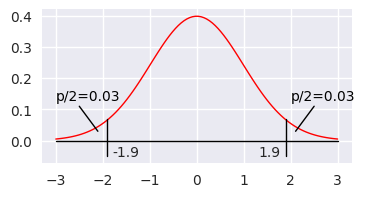

In [28]:
# show meanTestT with p-value
plt.style.use('seaborn')
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
muNorm, sigmaNorm = 0, 1
x = np.linspace(muNorm - 3 * sigmaNorm, muNorm + 3 * sigmaNorm, 100)
plt.plot(x, t.pdf(x, 99), color='red', linewidth=1.0)
plt.plot([-3, 3], [0, 0], color='black', linewidth=1.0)

plt.plot([meanTestT, meanTestT], [-0.05, 0.07], color='black', linewidth=1.0)
plt.text(meanTestT + 0.1, -0.05, f"{round(meanTestT, 2)}")
plt.plot([-meanTestT, -meanTestT], [-0.05, 0.07], color='black', linewidth=1.0)
plt.text(-meanTestT - 0.6, -0.05, f"{round(-meanTestT, 2)}")

plt.text(-3, 0.13, f"p/2={pLeft}", color='black')
plt.text(2, 0.13, f"p/2={pRight}", color='black')
plt.plot([-2.5, meanTestT - 0.2], [0.11, 0.03], color='black', linewidth=1.0)
plt.plot([2.5, -meanTestT + 0.2], [0.11, 0.03], color='black', linewidth=1.0)

plt.show()

In [29]:
h0IsFalseP = p < alpha # (formula 1.12)
print(f"H0 accepted ? {not h0IsFalseP}")
if (h0IsFalseP):
    print("The deviation of the mean value is statistically significant!")
else:
    print("The deviation of the mean value is not statistically significant!")

H0 accepted ? True
The deviation of the mean value is not statistically significant!


#### 1.3.1.3 Errors of the first and second kind

|  | H0 is true | H0 is false |
| :- | :-: | :-: |
| **H0 accepted**  | <span style="color:green">true</span> positive, 1 - &alpha; | <span style="color:red">false</span> positive, probability <span style="color:red">**&beta;**</span>, second kind |
| **H0 rejected** | <span style="color:red">false</span> negative, probability <span style="color:red">**&alpha;**</span> (significance level), first kind | <span style="color:green">true</span> negative, 1 - &beta;, selectivity |

#### 1.3.1.4 Conducting a one-sided mean test

In [30]:
# H0: mu >= 7.5, H1: mu < 7.5
tAlpha = t.ppf(alpha, df=N-1) # one-sided
print(round(tAlpha, 2))

-1.66


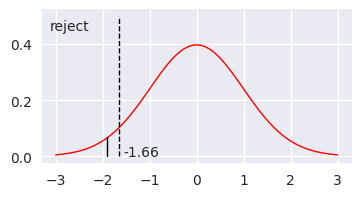

In [31]:
# show tAlpha
plt.style.use('seaborn')
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
muNorm, sigmaNorm = 0, 1
x = np.linspace(muNorm - 3 * sigmaNorm, muNorm + 3 * sigmaNorm, 100)
plt.plot(x, t.pdf(x, 99), color='red', linewidth=1.0)
plt.plot([meanTestT, meanTestT], [0.0, 0.07], color='black', linewidth=1.0)
plt.plot([tAlpha, tAlpha], [0.0, 0.5], color='black', linewidth=1.0, linestyle='dashed')
plt.text(-2.7, 0.45, f"reject", horizontalalignment='center')
plt.text(tAlpha + 0.1, 0.0, f"{round(tAlpha, 2)}")
plt.show()

In [32]:
h0IsFalseOne = abs(meanTestT) > tAlpha # (formula 1.13)
print(f"H0 accepted ? {not h0IsFalseOne}")
if (h0IsFalseOne):
    print("The deviation of the mean value is statistically significant!")
else:
    print("The deviation of the mean value is not statistically significant!")

H0 accepted ? False
The deviation of the mean value is statistically significant!


In [33]:
# or with p-value
h0IsFalseOneP = pLeft < alpha
print(f"H0 accepted ? {not h0IsFalseOneP}")
if (h0IsFalseOneP):
    print("The deviation of the mean value is statistically significant!")
else:
    print("The deviation of the mean value is not statistically significant!")

H0 accepted ? False
The deviation of the mean value is statistically significant!


### 1.3.2 Conducting a test for quantities